<a href="https://colab.research.google.com/github/ashish244co/SHALA2020/blob/master/Ashish_Kashav_Assignment_ML_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

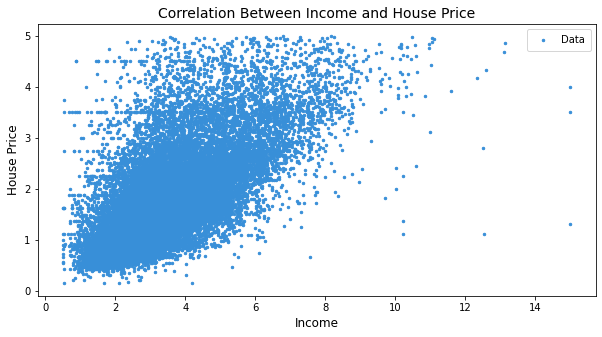

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
X=(X-X.mean())/X.std()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  ################################################
  ####write your code here######################## 
  #################################################      
  m=np.random.randn(2) 
  Xnew=np.column_stack((X,np.ones(len(X))))
  errs=[]
  for epoch in range(0,epochs):
    for i in range(0,len(X),batch_size):
      Xbatch=Xnew[i:i+batch_size]
      ybatch=y[i:i+batch_size]
      h=Xbatch.T@m
      m=m-lr*(-2*(-Xbatch@(h-ybatch)))/len(X)
    
    mse=round(1/len(X)*np.sum((y-(Xnew@m))**2,axis=0),4)
    if(epoch%10==0):
      print('Epoch:',epoch,' Error(MSE):',mse)
    errs.append(mse)
  b=m[1]

    
  return m, b, mse,errs

In [9]:
m, b,  mse,errs = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

Epoch: 0  Error(MSE): 3.3204
Epoch: 10  Error(MSE): 2.6037
Epoch: 20  Error(MSE): 2.4328
Epoch: 30  Error(MSE): 2.4697
Epoch: 40  Error(MSE): 2.5681
Epoch: 50  Error(MSE): 2.6693
Epoch: 60  Error(MSE): 2.7529
Epoch: 70  Error(MSE): 2.8152
Epoch: 80  Error(MSE): 2.8582
Epoch: 90  Error(MSE): 2.8858


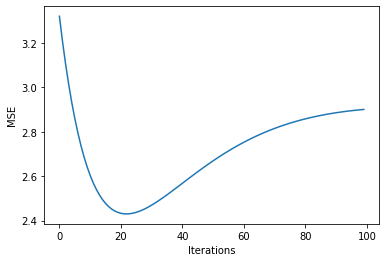

In [10]:
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.plot(errs)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

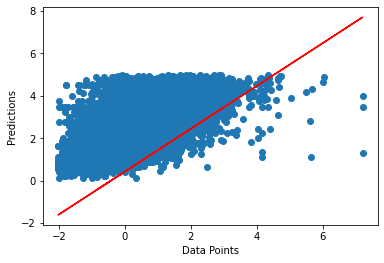

In [11]:
y_pred = np.column_stack((X,np.ones(len(X))))@m



################################################
###########write your code#####################
###############################################
plt.ylabel('Predictions')
plt.xlabel('Data Points')
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')